In [5]:
import warnings

In [6]:
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import pandas as pd
import statsmodels.api as sm
import matplotlib
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows=50
pd.options.display.max_columns=10


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


In [7]:
import matplotlib.pyplot as plt

plt.rcParams[ 'figure.figsize' ] = (15,4)
plt.rcParams[ 'axes.labelsize' ] = 14
plt.rcParams[ 'xtick.labelsize' ] = 12
plt.rcParams[ 'ytick.labelsize' ] = 12

plt.rcParams[ 'text.color' ] = "k"

## Import Dataset

In [42]:
import pandas as pd

data= pd.read_excel('/content/daily-total-female-births-CA.xlsx', engine='openpyxl')


In [9]:
data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [11]:
data['date'].max() - data['date'].min()

Timedelta('364 days 00:00:00')

In [12]:
data['DayOfWeek'] = data['date'].dt.day_name()
print(data['DayOfWeek'])
data['month_name'] = data['date'].dt.month_name()
print(data['month_name'])

0       Thursday
1         Friday
2       Saturday
3         Sunday
4         Monday
         ...    
360       Sunday
361       Monday
362      Tuesday
363    Wednesday
364     Thursday
Name: DayOfWeek, Length: 365, dtype: object
0       January
1       January
2       January
3       January
4       January
         ...   
360    December
361    December
362    December
363    December
364    December
Name: month_name, Length: 365, dtype: object


In [13]:
data.set_index('date',inplace=True)

In [14]:
data

,births,DayOfWeek,month_name
date,,,
1959-01-01,35,Thursday,January
1959-01-02,32,Friday,January
1959-01-03,30,Saturday,January
1959-01-04,31,Sunday,January
1959-01-05,44,Monday,January
...,...,...,...
1959-12-27,37,Sunday,December
1959-12-28,52,Monday,December
1959-12-29,48,Tuesday,December


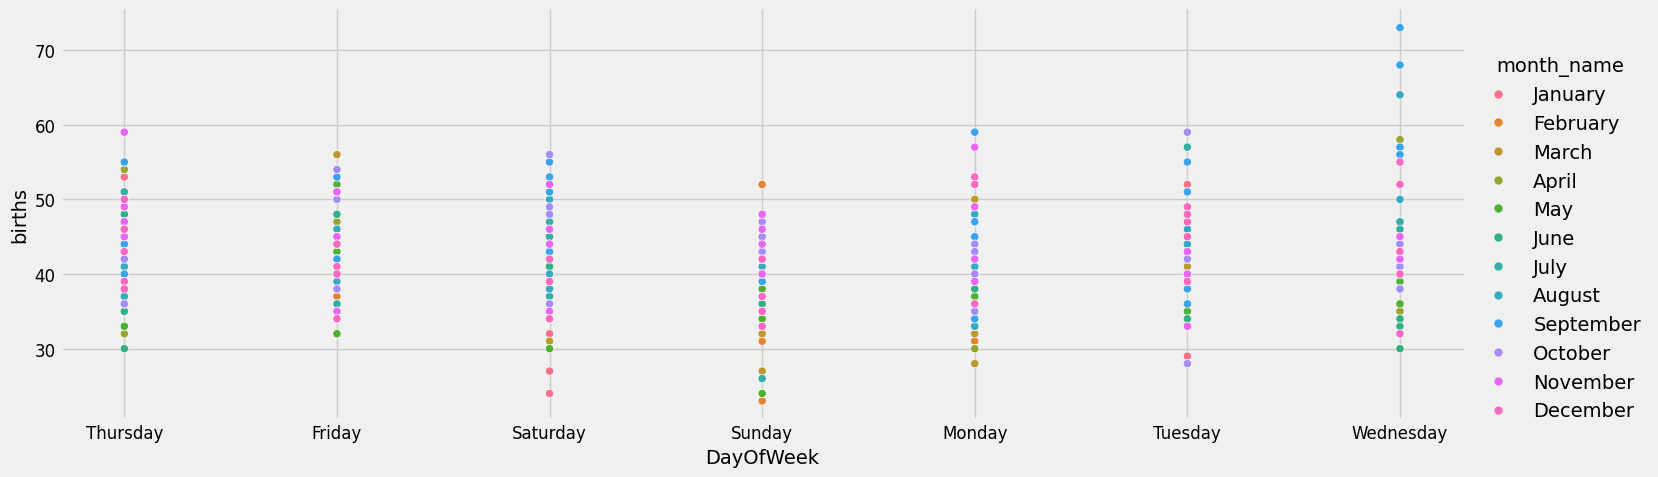

In [15]:
sns.relplot(x="DayOfWeek",y="births",hue="month_name",data=data,height=5,aspect=3)

### ----Testing For Stationarity----




In [16]:

from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(births):
    result=adfuller(births)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adfuller_test(data['births'])

ADF Test Statistic : -4.808291253559765
p-value : 5.2434129901498554e-05
#Lags Used : 6
Number of Observations Used : 358
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


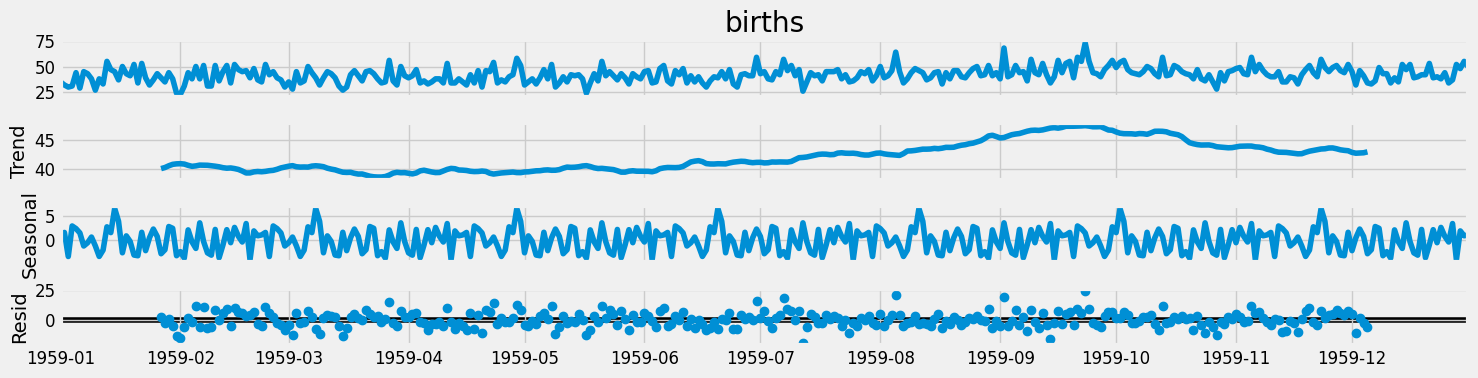

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
final = seasonal_decompose(data['births'],model='additive', period = 52) # annual=1,Quaterly=4,monthly=12,weekly=52
final.plot();

In [19]:
print(data.shape)
train_size = int(len(data) * 0.80)
train, test = data[0:train_size], data[train_size:]
print(train.shape,test.shape)

(365, 3)
(292, 3) (73, 3)


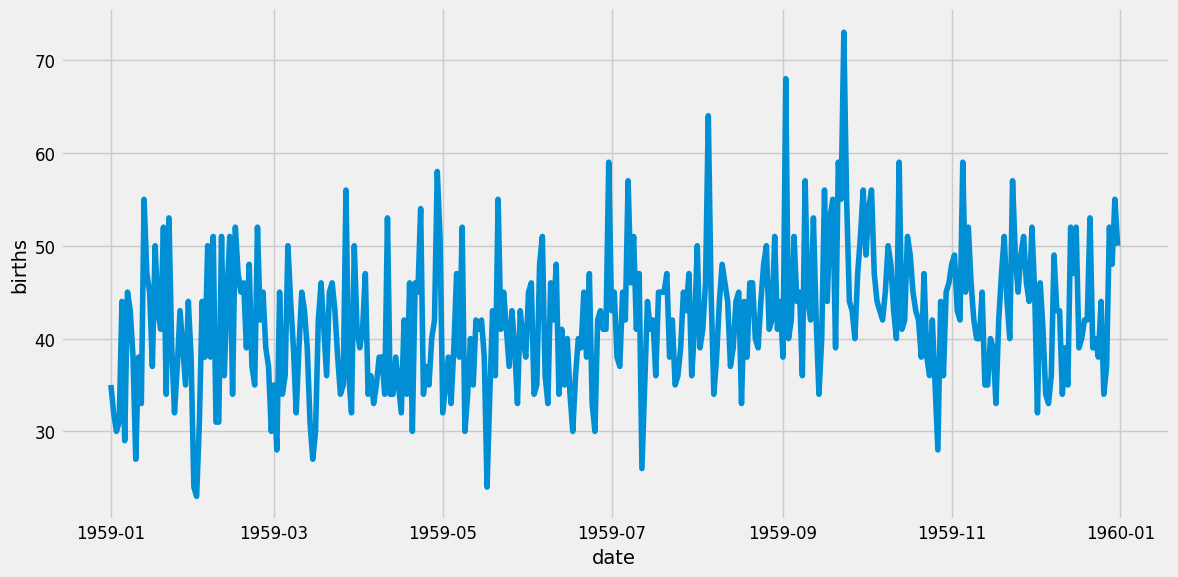

In [20]:
sns.relplot(x = 'date', y = 'births', data = data, kind = 'line',height=6,aspect=2)

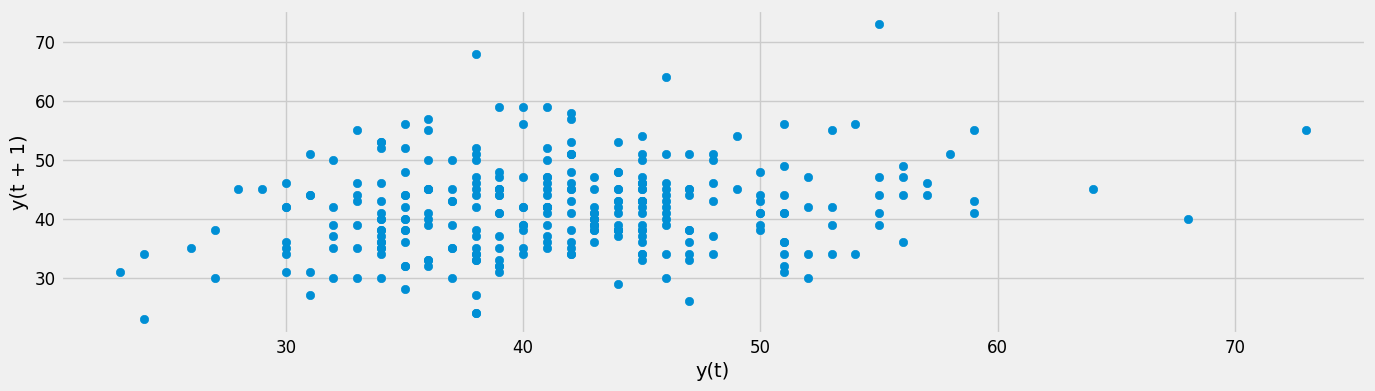

In [21]:
from pandas.plotting import lag_plot
lag_plot(train["births"])
plt.show()

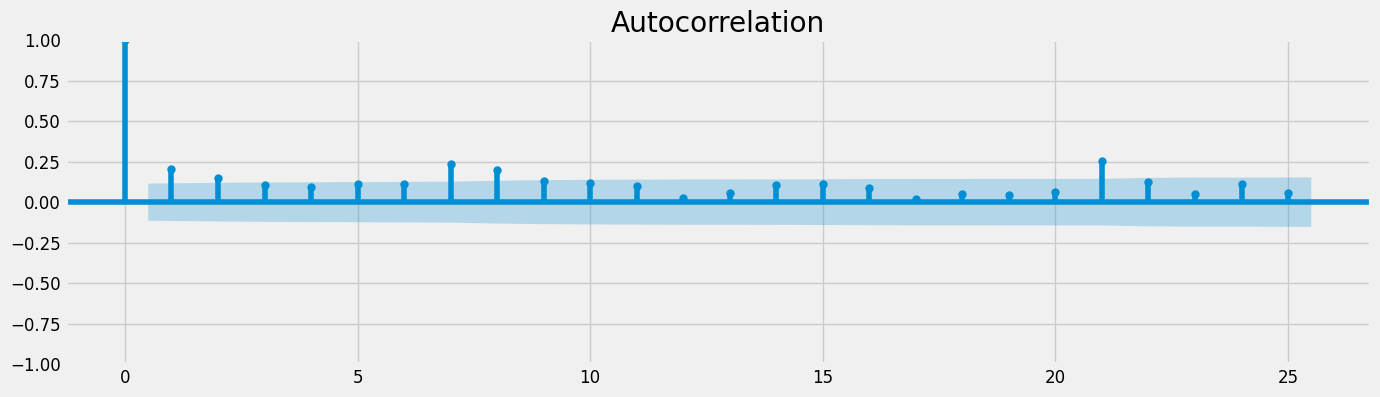

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train["births"])
plt.show()

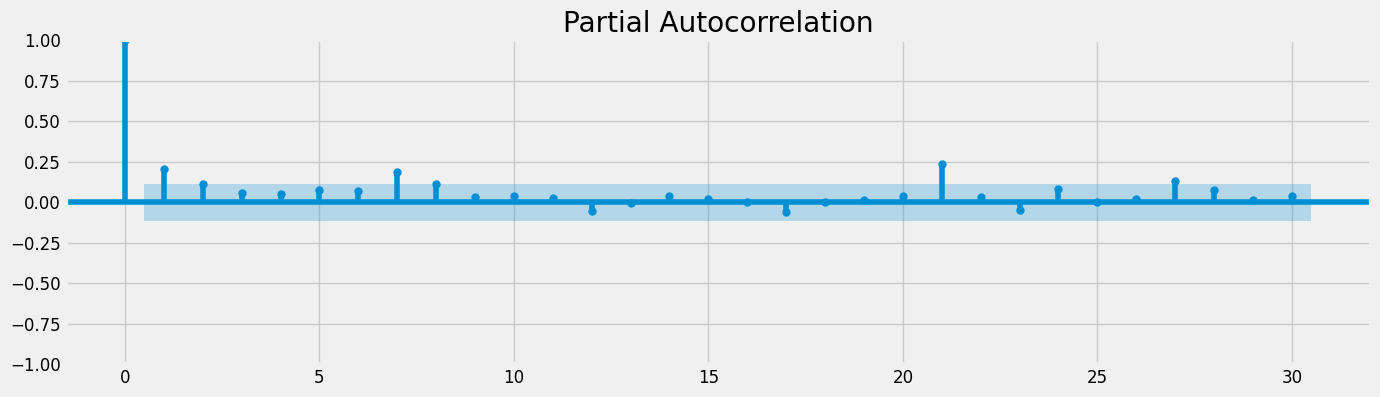

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train["births"], lags=30)
plt.show()

In [24]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00


In [25]:
from pmdarima import auto_arima

In [26]:
stepwise_fit = auto_arima(train['births'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1978.958, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2140.816, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2071.359, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1974.613, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2138.818, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1974.959, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1975.012, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1976.941, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1975.608, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.929 seconds


In [27]:
from statsmodels.tsa.arima.model import ARIMA

# Update the model creation line to use the new class
model = ARIMA(train['births'], order=(0, 0, 1))

# Keep the rest of the code as is
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 births   No. Observations:                  292
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -998.778
Date:                Mon, 06 May 2024   AIC                           2003.556
Time:                        18:00:44   BIC                           2014.586
Sample:                    01-01-1959   HQIC                          2007.974
                         - 10-19-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7178      0.538     77.550      0.000      40.663      42.772
ma.L1          0.1661      0.059      2.820      0.005       0.051       0.282
sigma2        54.7637      4.020     13.621      0.000      46.884      62.644
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                25.34
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.57
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
model.predict()

1959-01-01    41.717781
1959-01-02    40.631740
1959-01-03    40.284866
1959-01-04    40.009207
1959-01-05    40.221097
                ...    
1959-10-15    41.113351
1959-10-16    41.865079
1959-10-17    43.235352
1959-10-18    42.675453
1959-10-19    42.103955
Freq: D, Name: predicted_mean, Length: 292, dtype: float64

<Axes: xlabel='date'>

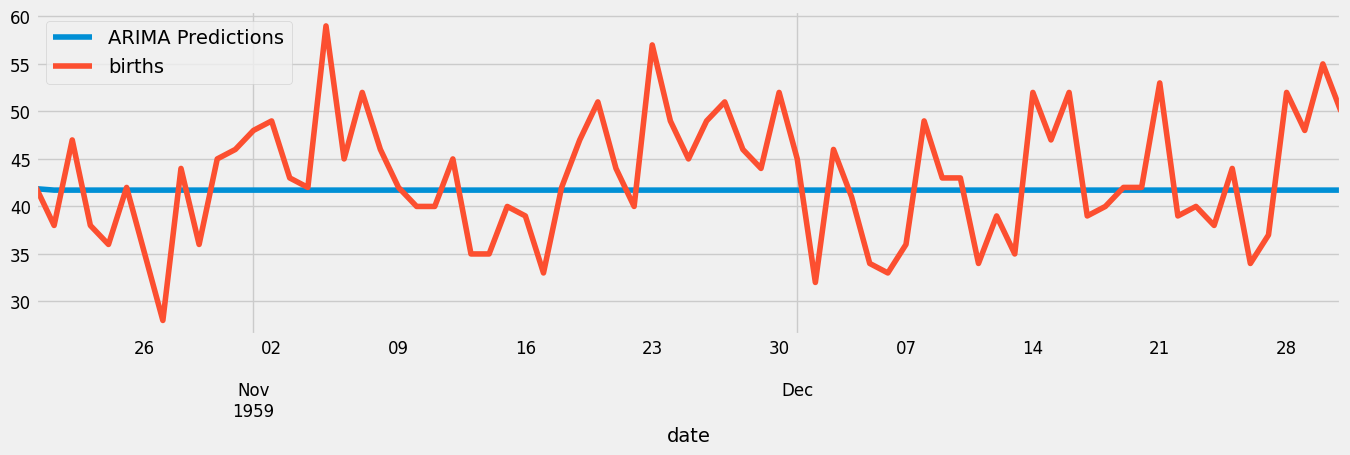

In [29]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end).rename('ARIMA Predictions')
pred.plot(legend=True)
test['births'].plot(legend=True)

In [30]:
data["births"].mean()

41.98082191780822

In [31]:
model2=ARIMA(data['births'],order=(3,0,2))
model2=model2.fit()
test.tail()

,births,DayOfWeek,month_name
date,,,
1959-12-27,37,Sunday,December
1959-12-28,52,Monday,December
1959-12-29,48,Tuesday,December
1959-12-30,55,Wednesday,December
1959-12-31,50,Thursday,December


In [32]:
index_future_dates=pd.date_range(start='2020-05-15',end='2020-05-31')
#print(index_future_dates)
pred=model2.predict(start=len(data),end=len(data)+16).rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2020-05-15    43.713660
2020-05-16    43.707665
2020-05-17    43.024581
2020-05-18    43.582936
2020-05-19    43.001283
2020-05-20    43.532020
2020-05-21    42.985419
2020-05-22    43.483698
2020-05-23    42.969351
2020-05-24    43.437060
2020-05-25    42.953033
2020-05-26    43.392024
2020-05-27    42.936507
2020-05-28    43.348519
2020-05-29    42.919811
2020-05-30    43.306478
2020-05-31    42.902980
Freq: D, Name: ARIMA Predictions, dtype: float64


## Daily Forecast with Seasonality

In [33]:
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(train['births'], start_p = 1, d=1, start_q = 1,
                          max_p = 5, max_q = 5, max_d=5, m = 12,
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True,
                          trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2259.162, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2102.930, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.78 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2199.423, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2066.336, Time=0.96 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=2050.093, Time=1.44 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=2036.737, Time=1.96 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=2034.161, Time=5.00 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=40.88 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=2023.293, Time=8.23 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=2021.472, Time=3.71 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.23 sec
 ARIMA(1,1,0)(3,1,2)[12]             : AIC=inf, Time=11.27 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC

## Best model:  ARIMA(1,1,0)(3,1,1)[12]          
  ## Total fit time: 121.013 seconds

In [34]:
## WE have used this Line of Code for Not-Best model

from statsmodels.tsa.statespace.sarimax import SARIMAX
model1=SARIMAX(train['births'],order=(2,1,2),seasonal_order=(0,1,1,12))
results=model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               births   No. Observations:                  292
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -962.338
Date:                              Mon, 06 May 2024   AIC                           1936.676
Time:                                      18:03:15   BIC                           1958.464
Sample:                                  01-01-1959   HQIC                          1945.416
                                       - 10-19-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9017      0.087    -10.343      0.000      -1.073      -0.731
ar.L2          0.0793      0.067      1.174      0.240      -0.053       0.212
ma.L1          0.0341      2.391      0.014      0.989      -4.652       4.720
ma.L2         -0.9653      2.308     -0.418      0.676      -5.489       3.558
ma.S.L12      -0.9968      1.184     -0.842      0.400      -3.317       1.323
sigma2        49.4615    119.031      0.416      0.678    -183.834     282.757
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                18.76
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.34
Prob(H) (two-sided):                  0.90   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
## Now we are going to use the Best model for this Model

from statsmodels.tsa.statespace.sarimax import SARIMAX
model1=SARIMAX(train['births'],order=(1,1,0),seasonal_order=(3,1,1,12))
results=model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               births   No. Observations:                  292
Model:             SARIMAX(1, 1, 0)x(3, 1, [1], 12)   Log Likelihood               -1004.736
Date:                              Mon, 06 May 2024   AIC                           2021.472
Time:                                      18:03:20   BIC                           2043.259
Sample:                                  01-01-1959   HQIC                          2030.212
                                       - 10-19-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4738      0.051     -9.225      0.000      -0.574      -0.373
ar.S.L12      -0.1735      0.074     -2.348      0.019      -0.318      -0.029
ar.S.L24      -0.0529      0.082     -0.646      0.519      -0.213       0.108
ar.S.L36      -0.0243      0.078     -0.310      0.756      -0.178       0.129
ma.S.L12      -0.8730      0.065    -13.431      0.000      -1.000      -0.746
sigma2        72.5467      6.407     11.323      0.000      59.990      85.104
===================================================================================
Ljung-Box (L1) (Q):                   4.61   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.03   Prob(JB):                         0.58
Heteroskedasticity (H):               1.10   Skew:                             0.14
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

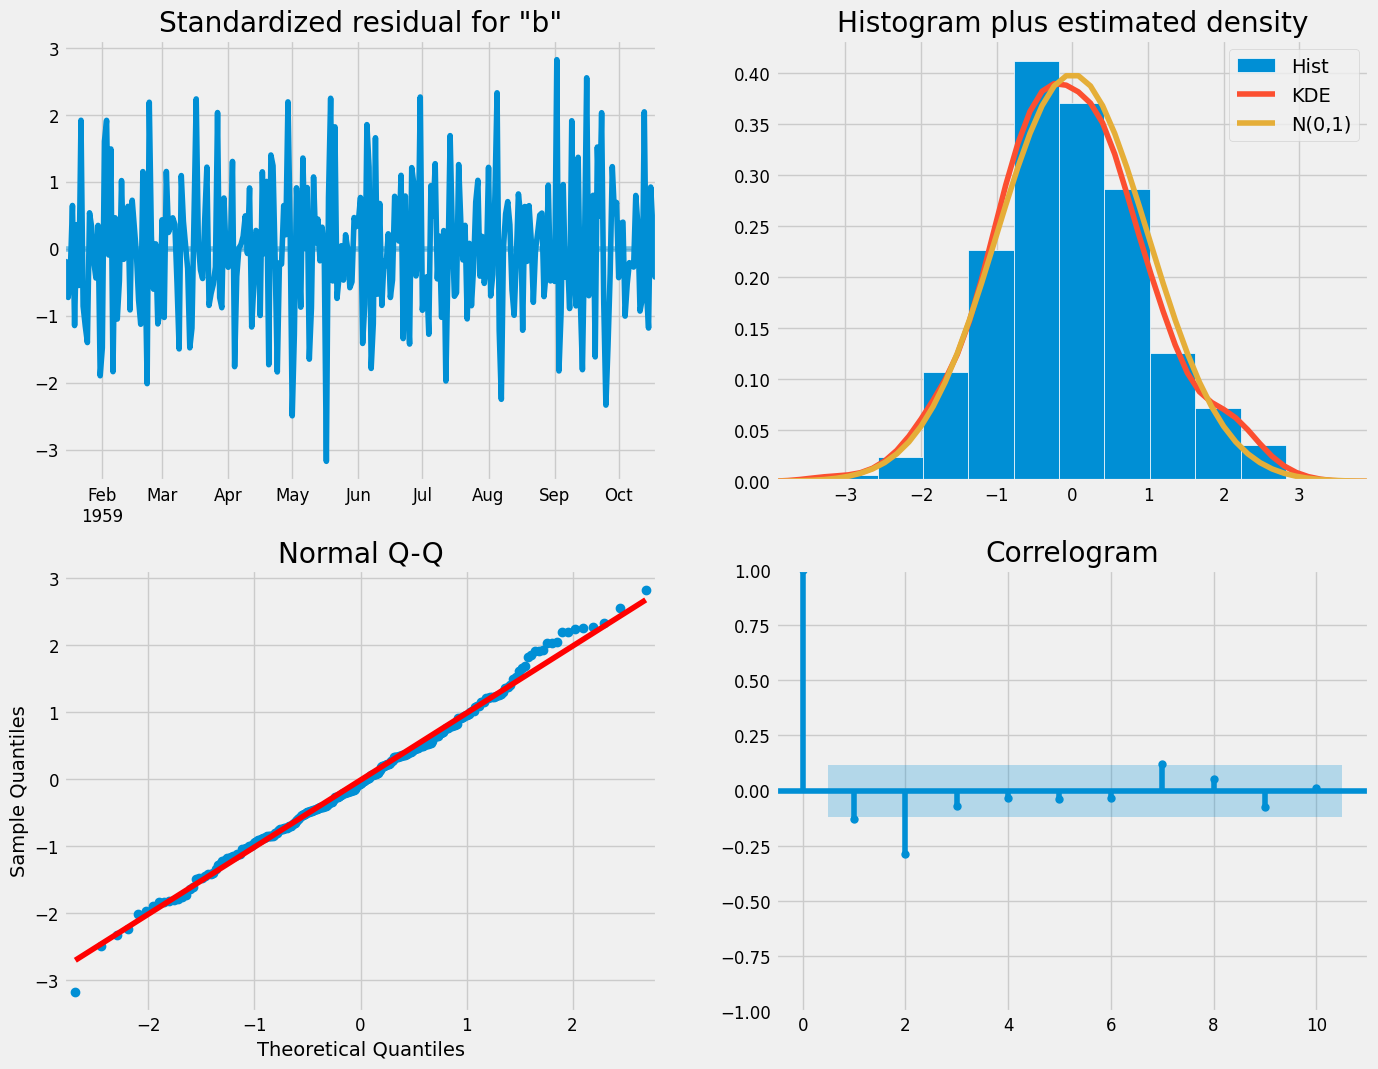

In [36]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

<Axes: xlabel='date'>

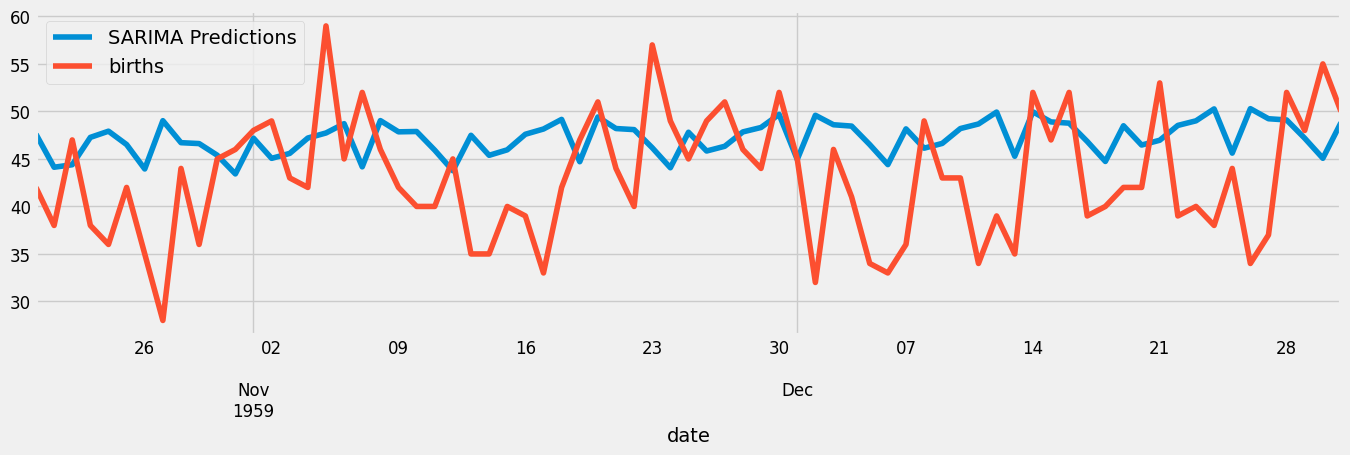

In [37]:
start=len(train)
end=len(train)+len(test)-1
pred=results.predict(start=start,end=end).rename('SARIMA Predictions')
pred.plot(legend=True)
test['births'].plot(legend=True)

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['births'].mean()
rmse=sqrt(mean_squared_error(pred,test['births']))
print(rmse)

7.994579453915675


In [39]:
model3=SARIMAX(train['births'],order=(1,1,2),seasonal_order=(5,1,0,12))
model3=model3.fit()

In [40]:
index_future_dates=pd.date_range(start='2020-05-15',end='2020-05-31')
#print(index_future_dates)
pred=model3.predict(start=len(data),end=len(data)+16).rename('SARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2020-05-15    49.674020
2020-05-16    54.664793
2020-05-17    54.126796
2020-05-18    55.673879
2020-05-19    58.414251
2020-05-20    50.370495
2020-05-21    59.381646
2020-05-22    56.060009
2020-05-23    58.160080
2020-05-24    54.984317
2020-05-25    49.775065
2020-05-26    53.870939
2020-05-27    50.697816
2020-05-28    55.486962
2020-05-29    54.665163
2020-05-30    56.102679
2020-05-31    59.814251
Freq: D, Name: SARIMA Predictions, dtype: float64


<Axes: xlabel='date'>

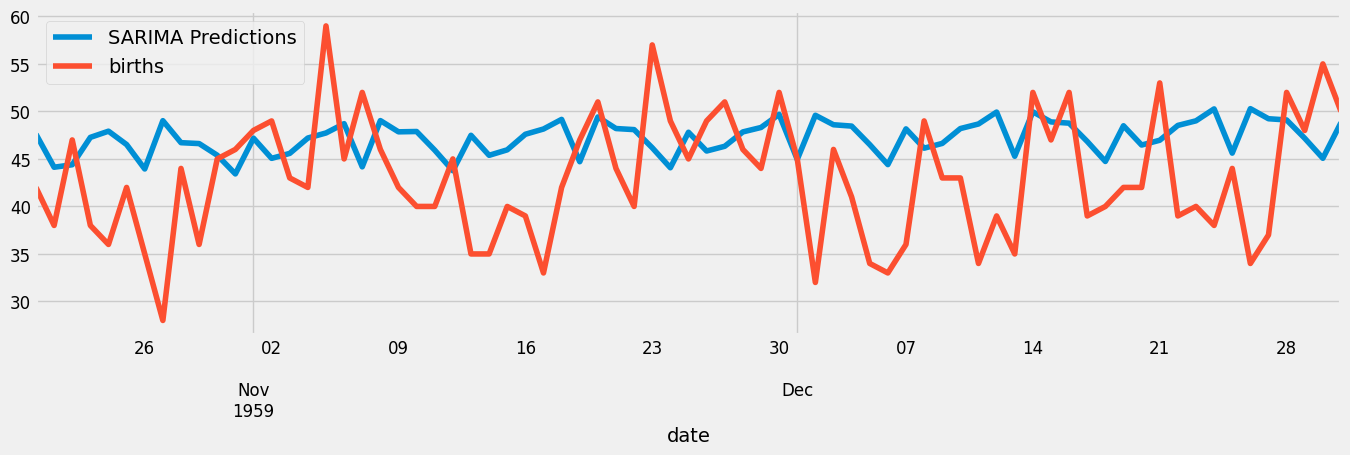

In [41]:
start=len(train)
end=len(train)+len(test)-1
pred=results.predict(start=start,end=end).rename('SARIMA Predictions')
pred.plot(legend=True)
test['births'].plot(legend=True)